# Pytorch Session 2: Linear regression

In [1]:
import torch
import numpy as np

# 1. Gradient descent

## 1.1 Gradient descent in 1-dim

### Example 1: 
You are given 

$f(x)=(x-2)^2+3$.

You want to minimize ```f``` by finding proper value of ```x=x^*```.

You know 

$\frac{d f}{d x}=2(x-2)$.

You want to start $x_0 = 6$ with learning rate ```lr=0.1```.

In [2]:
def df(x):
  return 2*(x-2)
lr= 0.1
x0 = 8.0
x1 = x0 - lr*df(x0)
x2 = x1 - lr*df(x1)
x3 = x2 - lr*df(x2)

In [4]:
print(x0)
print(x1)
print(x2)

8.0
6.8
5.84


In [12]:
x=6
lr=0.1
print(x, df(x))
for i in range(10):
  x=x-lr*df(x)
  print(x, df(x))

6 8
5.2 6.4
4.5600000000000005 5.120000000000001
4.048 4.096
3.6384 3.2767999999999997
3.31072 2.6214399999999998
3.0485759999999997 2.0971519999999995
2.8388608 1.6777216
2.67108864 1.3421772799999996
2.536870912 1.0737418239999998
2.4294967296 0.8589934591999997


In [ ]:
df(1.34)

-1.3199999999999998

## 1.2 Gradient descent in 2 dim

### Example 2: 
You are given 

$f(\boldsymbol{\beta})=(\beta_1-2)^2+3(\beta_2-3)^2+3$.

You want to minimize ```f``` by finding proper value of ```\boldsymbol{\beta}```.

You know 

$\triangledown f=(2(\beta_1-2), 3(\beta_2-3))$.

In [ ]:
beta=np.array([10.0,20.0])
lr=0.1
print(beta, df(beta))
def df(beta):
  return np.array([2*(beta[0]-2), 6*(beta[1]-3)])
for i in range(20):
  beta = beta - lr*df(beta)
  print(beta, df(beta))

[10. 20.] [ 16. 102.]
[8.4 9.8] [12.8 40.8]
[7.12 5.72] [10.24 16.32]
[6.096 4.088] [8.192 6.528]
[5.2768 3.4352] [6.5536 2.6112]
[4.62144 3.17408] [5.24288 1.04448]
[4.097152 3.069632] [4.194304 0.417792]
[3.6777216 3.0278528] [3.3554432 0.1671168]
[3.34217728 3.01114112] [2.68435456 0.06684672]
[3.07374182 3.00445645] [2.14748365 0.02673869]
[2.85899346 3.00178258] [1.71798692 0.01069548]
[2.68719477 3.00071303] [1.37438953 0.00427819]
[2.54975581 3.00028521] [1.09951163 0.00171128]
[2.43980465 3.00011409] [8.79609302e-01 6.84510413e-04]
[2.35184372 3.00004563] [7.03687442e-01 2.73804165e-04]
[2.28147498 3.00001825] [5.62949953e-01 1.09521666e-04]
[2.22517998 3.0000073 ] [4.50359963e-01 4.38086664e-05]
[2.18014399 3.00000292] [3.60287970e-01 1.75234666e-05]
[2.14411519 3.00000117] [2.88230376e-01 7.00938663e-06]
[2.11529215 3.00000047] [2.30584301e-01 2.80375465e-06]
[2.09223372 3.00000019] [1.84467441e-01 1.12150186e-06]


We can solve Example 2 using pytorch and auto differentiation.

In [ ]:
beta = torch.tensor([10.0, 20.0], requires_grad=True)
def f(beta):
  return (beta[0]-2)**2+3*(beta[1]-3)**2+3

loss = f(beta)
loss.backward()
beta.grad

beta.data = beta.data - lr*beta.grad
print(beta)
beta.grad.data.zero_() # this is important!!!

tensor([  5.2000, -10.6000], requires_grad=True)


tensor([0., 0.])

In [ ]:
loss=f(beta)
loss.backward()
beta.grad

beta.data = beta.data - lr*beta.grad
print(beta)
beta.grad.data.zero_()

tensor([ 3.2800, 13.8800], requires_grad=True)


tensor([0., 0.])

In [ ]:
beta = torch.tensor([10.0, 20.0], requires_grad=True)
def f(beta):
  return (beta[0]-2)**2+3*(beta[1]-3)**2+3
print(beta.data)
history = []
for i in range(5):
  loss = f(beta)
  history.append(loss)
  loss.backward()
  beta.data = beta.data - lr*beta.grad
  beta.grad.zero_()
  print(beta.data)

tensor([10., 20.])
tensor([  5.2000, -10.6000])
tensor([ 3.2800, 13.8800])
tensor([ 2.5120, -5.7040])
tensor([2.2048, 9.9632])
tensor([ 2.0819, -2.5706])


In [ ]:
import matplotlib.pyplot as plt 

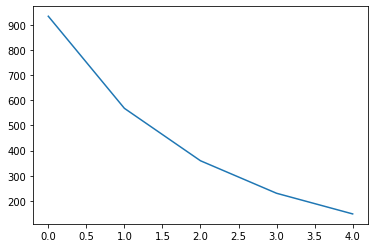

In [ ]:
plt.plot(history)

## 2. Linear Regression 1D (using autograd): 


Let us create the following expressions:


$b=-1,w=2$

$\hat{y}=wx+b$


First, define the parameters:


In [ ]:
w0 = torch.tensor(2.0)
b0 = torch.tensor(-1.0)

In [ ]:
xs=torch.tensor([1.5, 3.0, 2.7])
yhats = w0*x+b0

NameError: ignored

## 2.1 Make some data

In [ ]:
torch.manual_seed(2021)
X = torch.arange(-3,3, 0.1).view(-1, 1)
f = w0*X+b0
print(X.shape, f.shape)

torch.Size([60, 1]) torch.Size([60, 1])


In [ ]:
Y = f + torch.randn(f.shape)

In [ ]:
X.shape
Y.shape

torch.Size([60, 1])

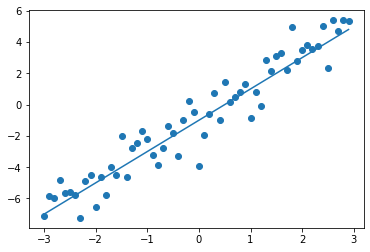

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X.numpy(),Y.numpy())
plt.plot(X.numpy(),f.numpy())

## 2.2 Create the model and cost function

You are given X and Y.

Your goal is to find the best linear model to explain the relation between X and Y by minimizing the following

$Loss(w, b)=\sum\limits_{i=1}^{n}(Y_i-Yhat_i)^2$

where

$Yhat_i:=X_i*w +b$.

In [ ]:
def forward(x):
  return x*w+b

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
  
w = torch.tensor(10.0, requires_grad=True)
b = torch.tensor(10.0, requires_grad=True)

In [ ]:
history=[]
lr=0.1
for epoch in range(100):
  Yhat = forward(X)
  loss = criterion(Yhat,Y)
  history.append(loss)
  loss.backward()
  w.data = w.data-lr*w.grad.data
  b.data = b.data-lr*b.grad.data
  w.grad.data.zero_()
  b.grad.data.zero_()




Now our goal is to find ```w``` and ```b``` which minimize ```loss``` function.

In [ ]:
w

tensor(2.0347, requires_grad=True)

In [ ]:
b

tensor(-0.8091, requires_grad=True)

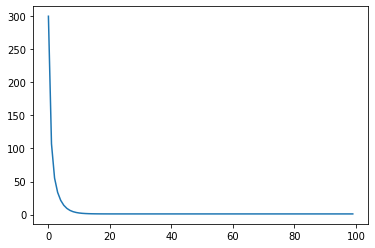

In [ ]:
plt.plot(history)

# 3. Stochastic Gradient Descent (SGD) using Dataset and DataLoader

In [ ]:
class test1():
  def __init__(self):
    self.x=[102,20,30]
  def __getitem__(self, index):
    return self.x[index]

mydata = test1()
mydata[0]

102

In [ ]:
# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Create class Data

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        f = w0*self.x+b0
        self.y = f+torch.randn(f.shape)
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [ ]:
dataset = Data()

In [ ]:
X,Y=dataset[:]

In [ ]:
X[:5]

tensor([[-3.0000],
        [-2.9000],
        [-2.8000],
        [-2.7000],
        [-2.6000]])

In [ ]:
Y[:5]

tensor([[-7.1452],
        [-5.8253],
        [-5.9977],
        [-4.8225],
        [-5.6300]])

In [ ]:
trainloader=DataLoader(dataset = dataset, batch_size=1, shuffle=True)

In [ ]:
for i in trainloader:
  print(i)

[tensor([[1.6000]]), tensor([[2.7288]])]
[tensor([[0.4000]]), tensor([[0.5275]])]
[tensor([[1.2000]]), tensor([[2.6226]])]
[tensor([[-0.2000]]), tensor([[-1.6386]])]
[tensor([[-1.6000]]), tensor([[-4.2456]])]
[tensor([[-1.9000]]), tensor([[-2.3983]])]
[tensor([[1.3000]]), tensor([[0.9388]])]
[tensor([[-1.5000]]), tensor([[-3.7840]])]
[tensor([[-2.3000]]), tensor([[-6.1604]])]
[tensor([[-1.7000]]), tensor([[-4.4390]])]
[tensor([[-1.2000]]), tensor([[-2.1678]])]
[tensor([[2.2000]]), tensor([[1.8977]])]
[tensor([[0.3000]]), tensor([[0.5418]])]
[tensor([[0.5000]]), tensor([[0.9173]])]
[tensor([[-0.6000]]), tensor([[-2.2793]])]
[tensor([[-2.8000]]), tensor([[-7.4756]])]
[tensor([[-2.]]), tensor([[-5.2088]])]
[tensor([[-0.7000]]), tensor([[-1.8422]])]
[tensor([[0.1000]]), tensor([[-1.4424]])]
[tensor([[1.]]), tensor([[-1.0058]])]
[tensor([[1.5000]]), tensor([[3.3012]])]
[tensor([[-2.6000]]), tensor([[-6.8841]])]
[tensor([[0.9000]]), tensor([[0.7759]])]
[tensor([[2.3000]]), tensor([[2.2774]])

In [ ]:
w = torch.tensor(10.0, requires_grad=True)
b = torch.tensor(10.0, requires_grad=True)
def forward(x):
  return w*x+b
epochs =100
lr = 0.01
history = []
for epoch in range(epochs):
  Yhat = forward(X)
  epoch_loss = criterion(Yhat, Y)
  history.append(epoch_loss)
  for x,y in trainloader:
    yhat = forward(x)
    batch_loss = criterion(yhat,y)
    batch_loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()


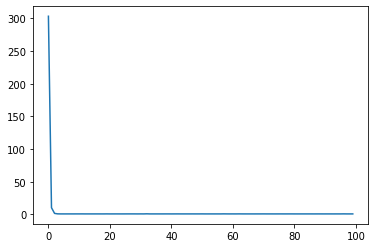

In [ ]:
plt.plot(history)

In [ ]:
print(w,b)

tensor(1.8876, requires_grad=True) tensor(-0.8636, requires_grad=True)


## Exercise: 

Repeat the above procedure with batc size equals 5

# 4. Stochastic Gradient Descent (SGD) using Pytorch functions



In [ ]:
from torch import nn, optim

In [ ]:
temp = nn.Linear(1,1)

In [ ]:
temp?
print(temp.weight, temp.bias)
temp(torch.tensor([[2.0], [1.0], [3.0]]))

Parameter containing:
tensor([[0.4774]], requires_grad=True) Parameter containing:
tensor([-0.7518], requires_grad=True)


tensor([[ 0.2031],
        [-0.2744],
        [ 0.6805]], grad_fn=<AddmmBackward>)

In [ ]:
for i in temp.parameters():
  print(i)

Parameter containing:
tensor([[0.4774]], requires_grad=True)
Parameter containing:
tensor([-0.7518], requires_grad=True)


In [ ]:
class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    yhat = self.linear(x)
    return yhat

In [ ]:
class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        f = w0*self.x+b0
        self.y = f+torch.randn(f.shape)
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [ ]:
model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr=0.01)
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)


In [ ]:
dataset.len

60

In [ ]:
iters = 10
history = []
for epoch in range(iters):
  Yhat = model(dataset.x)
  LOSS = criterion(Yhat, dataset.y)
  history.append(LOSS)
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


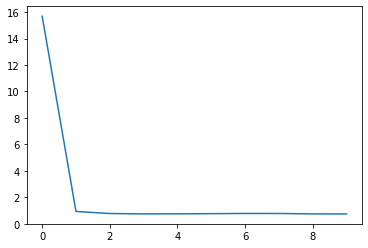

In [ ]:
plt.plot(history)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[2.0042]], requires_grad=True), Parameter containing:
 tensor([-0.7617], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[2.0042]])),
             ('linear.bias', tensor([-0.7617]))])

In [ ]:
model.linear.weight.item()

2.0042457580566406

### Exercise:

1.   Calculate MSE (mean squared error).
1.   Calculate MAE (mean absolute error).
2.   Assume that you are given ```x=1```. What woud be your yhat?




